In [52]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [53]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

- **GAME_ID**: Unique Identifier of the Game  
- **TEAM_ID**: Unique Identifier of the Team. For each GAME_ID there are only two TEAM_IDs.  
- **TEAM_ABBREVIATION**: Abbreviation of the Team (e.g., GSW - Golden State Warriors)  
- **TEAM_CITY**: City of the Team  
- **PLAYER_ID**: Unique Identifier of the Player  
- **PLAYER_NAME**: Complete Name (First and Last Name) of the Player who played the game  
- **NICKNAME**: Nickname of the Player who played the game  
- **START_POSITION**: Position in which the player started the game (If populated, the player started the game)  
- **COMMENT**: Additional comments  
- **MIN**: Number of minutes the player played in the game  
- **FGM**: Number of Field Goals (both 2 and 3 Points) made by the player in the game  
- **FGA**: Number of Field Goals (both 2 and 3 Points) attempted by the player in the game  
- **FG_PCT**: Field Goal percentage (both 2 and 3 Points) by the player in the game  
- **FG3M**: Number of 3-Point Field Goals made by the player in the game  
- **FG3A**: Number of 3-Point Field Goals attempted by the player in the game  
- **FG3_PCT**: 3-Point Field Goal percentage by the player in the game  
- **FTM**: Number of Free Throws made by the player in the game  
- **FTA**: Number of Free Throws attempted by the player in the game  
- **FT_PCT**: Free Throw percentage by the player in the game  
- **OREB**: Number of Offensive Rebounds by the player in the game  
- **DREB**: Number of Defensive Rebounds by the player in the game  
- **REB**: Total Rebounds (Offensive + Defensive) by the player in the game  
- **AST**: Number of Assists by the player in the game  
- **STL**: Number of Steals by the player in the game  
- **BLK**: Number of Blocks by the player in the game  
- **TO**: Number of Turnovers by the player in the game  
- **PF**: Number of Personal Fouls by the player in the game  
- **PTS**: Number of Points scored by the player in the game  
- **PLUS_MINUS**: Plus/Minus statistic for the player in the game  


In [55]:
df = pd.read_csv('NBA_DATASET.csv')

In [56]:
df.head()

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0,22400061,1610612752,NYK,New York,1628384,OG Anunoby,OG,F,NaN,...,0.0,5.0,5.0,3.0,1.0,0.0,0.0,3.0,4.0,-21.0
1,1,22400061,1610612752,NYK,New York,1628404,Josh Hart,Josh,F,NaN,...,1.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,12.0,-23.0
2,2,22400061,1610612752,NYK,New York,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,...,0.0,7.0,7.0,3.0,0.0,0.0,0.0,1.0,12.0,-18.0
3,3,22400061,1610612752,NYK,New York,1628969,Mikal Bridges,Mikal,G,NaN,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,16.0,-33.0
4,4,22400061,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,NaN,...,0.0,1.0,1.0,2.0,0.0,0.0,4.0,3.0,22.0,-23.0


In [57]:
df.shape

(736, 30)

1. Data Cleaning

In [58]:
df.isnull().sum()

Unnamed: 0             0
GAME_ID                0
TEAM_ID                0
TEAM_ABBREVIATION      0
TEAM_CITY              0
PLAYER_ID              0
PLAYER_NAME            0
NICKNAME               0
START_POSITION       476
COMMENT              606
MIN                  130
FGM                  130
FGA                  130
FG_PCT               130
FG3M                 130
FG3A                 130
FG3_PCT              130
FTM                  130
FTA                  130
FT_PCT               130
OREB                 130
DREB                 130
REB                  130
AST                  130
STL                  130
BLK                  130
TO                   130
PF                   130
PTS                  130
PLUS_MINUS           130
dtype: int64

In [59]:
#Filled null position values with 0
df['START_POSITION'] = df['START_POSITION'].fillna('0')


player_stats = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
             'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
             'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']

df[player_stats] = df[player_stats].fillna(0)

df.drop(columns=['COMMENT'],inplace= True)

In [60]:
df.isnull().sum()

Unnamed: 0           0
GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
START_POSITION       0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

In [61]:
df.dtypes

Unnamed: 0             int64
GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [62]:
#handling MIN column(object to float)
df['MIN'] = df['MIN'].astype(str).apply(
    lambda x: round(float(x.split(':')[0]) + int(x.split(':')[1]) / 60, 2) if ':' in x else float(x)
)


In [63]:
df.head()

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0,22400061,1610612752,NYK,New York,1628384,OG Anunoby,OG,F,34.17,...,0.0,5.0,5.0,3.0,1.0,0.0,0.0,3.0,4.0,-21.0
1,1,22400061,1610612752,NYK,New York,1628404,Josh Hart,Josh,F,24.50,...,1.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,12.0,-23.0
2,2,22400061,1610612752,NYK,New York,1626157,Karl-Anthony Towns,Karl-Anthony,C,23.62,...,0.0,7.0,7.0,3.0,0.0,0.0,0.0,1.0,12.0,-18.0
3,3,22400061,1610612752,NYK,New York,1628969,Mikal Bridges,Mikal,G,34.62,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,16.0,-33.0
4,4,22400061,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,24.50,...,0.0,1.0,1.0,2.0,0.0,0.0,4.0,3.0,22.0,-23.0


In [64]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [65]:
def clean_minutes(val):
    if isinstance(val, str) and ':' in val:
        mins, secs = val.split(':')
        return float(mins) + float(secs) / 60
    try:
        return float(val)
    except:
        return 0.0


2. Exploratary Data Analysis

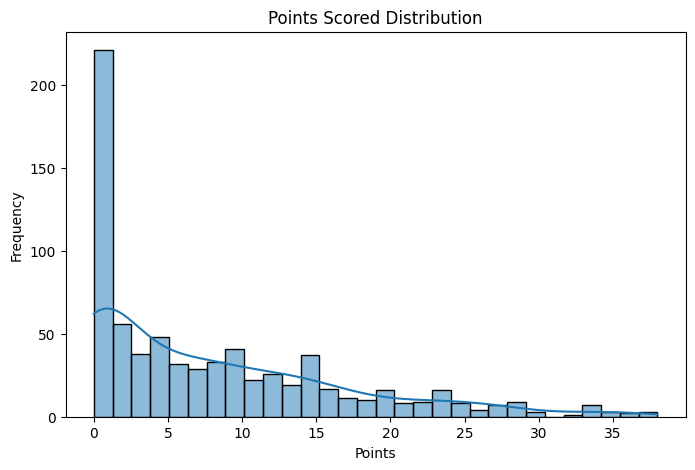

In [66]:
plt.figure(figsize=(8, 5))
sns.histplot(df['PTS'], bins=30, kde=True)
plt.title('Points Scored Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

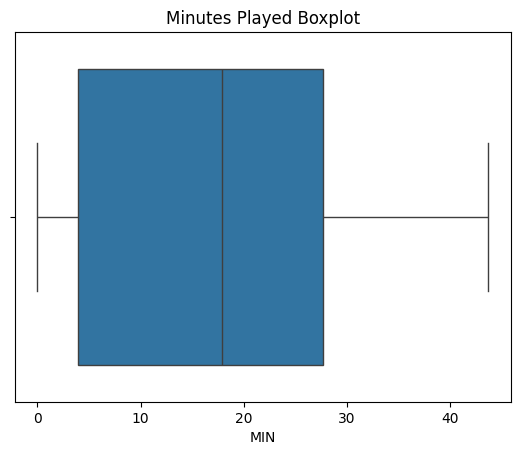

In [67]:
sns.boxplot(x=df['MIN'])
plt.title("Minutes Played Boxplot")
plt.show()


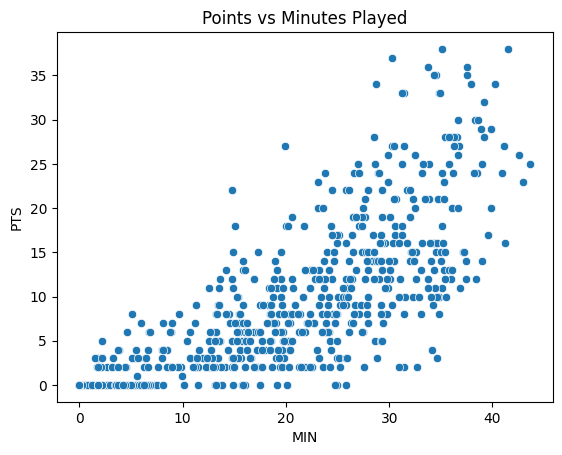

In [68]:
sns.scatterplot(x='MIN', y='PTS', data=df)
plt.title("Points vs Minutes Played")
plt.show()


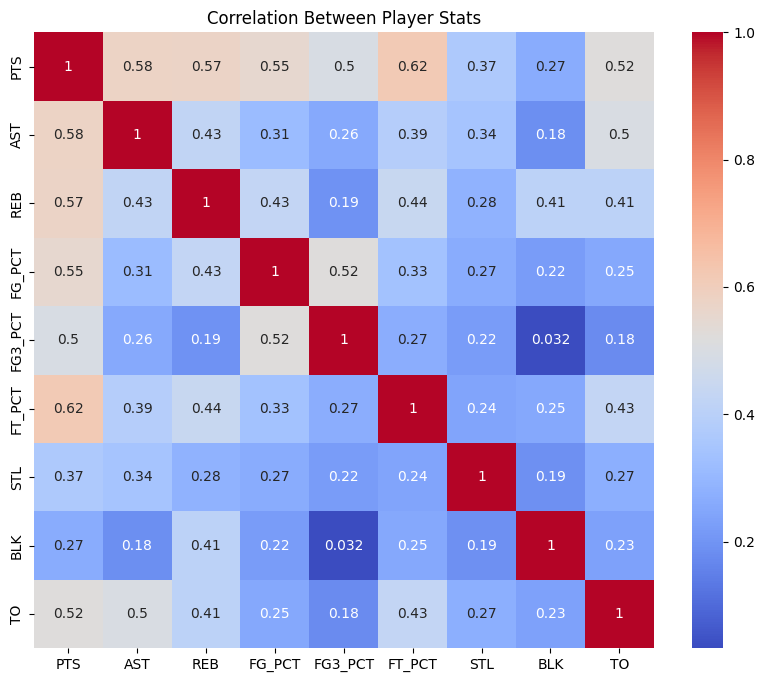

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['PTS','AST','REB','FG_PCT','FG3_PCT','FT_PCT','STL','BLK','TO']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Player Stats")
plt.show()


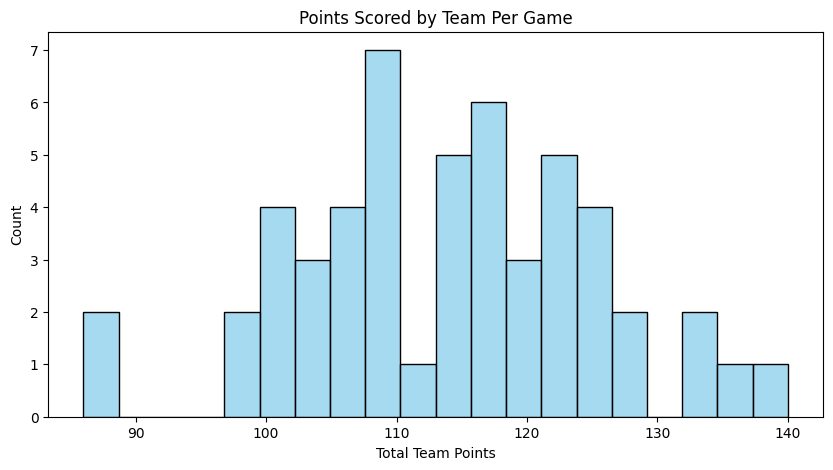

In [70]:
team_scores = df.groupby(['GAME_ID', 'TEAM_ABBREVIATION'])['PTS'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.histplot(team_scores['PTS'], bins=20, color='skyblue')
plt.title('Points Scored by Team Per Game')
plt.xlabel('Total Team Points')
plt.show()


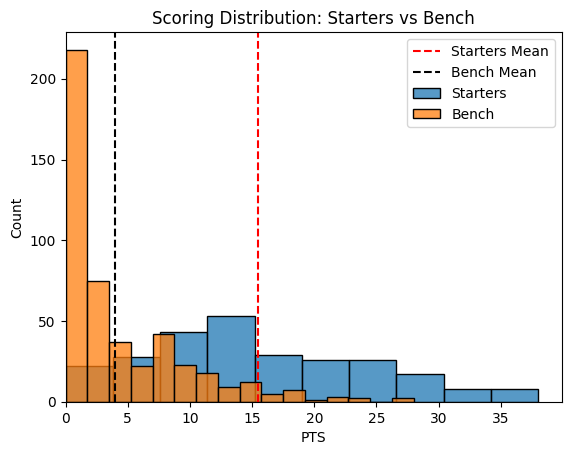

In [71]:
df['IS_STARTER'] = df['START_POSITION'].apply(lambda x: 0 if x in [0, '', '0'] else 1)

starters = df[df['IS_STARTER'] == 1]
bench = df[df['IS_STARTER'] == 0]

sns.histplot(starters['PTS'], label='Starters')
sns.histplot(bench['PTS'], label='Bench')
plt.title("Scoring Distribution: Starters vs Bench")
plt.axvline(starters['PTS'].mean(), color='red', linestyle='--', label='Starters Mean')
plt.axvline(bench['PTS'].mean(), color='black', linestyle='--', label='Bench Mean')
plt.xlim(0, None)
plt.legend()
plt.show()


In [72]:
print("Bench PTS Summary:")
print(bench['PTS'].describe())

print("\nNumber of non-zero bench scores:", (bench['PTS'] > 0).sum())


Bench PTS Summary:
count    476.000000
mean       4.002101
std        5.318686
min        0.000000
25%        0.000000
50%        2.000000
75%        7.000000
max       28.000000
Name: PTS, dtype: float64

Number of non-zero bench scores: 260


In [73]:
top_scores = df.sort_values(by='PTS', ascending=False).head(10)
print(top_scores[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'MIN']])


               PLAYER_NAME TEAM_ABBREVIATION   PTS    MIN
639  Giannis Antetokounmpo               MIL  38.0  35.13
532             Trae Young               ATL  38.0  41.48
13            Jayson Tatum               BOS  37.0  30.30
254             Cam Thomas               BKN  36.0  33.72
42           Anthony Davis               LAL  36.0  37.58
626             Coby White               CHI  35.0  34.37
122        Lauri Markkanen               UTA  35.0  34.57
697          Anthony Davis               LAL  35.0  37.50
314            LaMelo Ball               CHA  34.0  37.92
518            LaMelo Ball               CHA  34.0  28.72


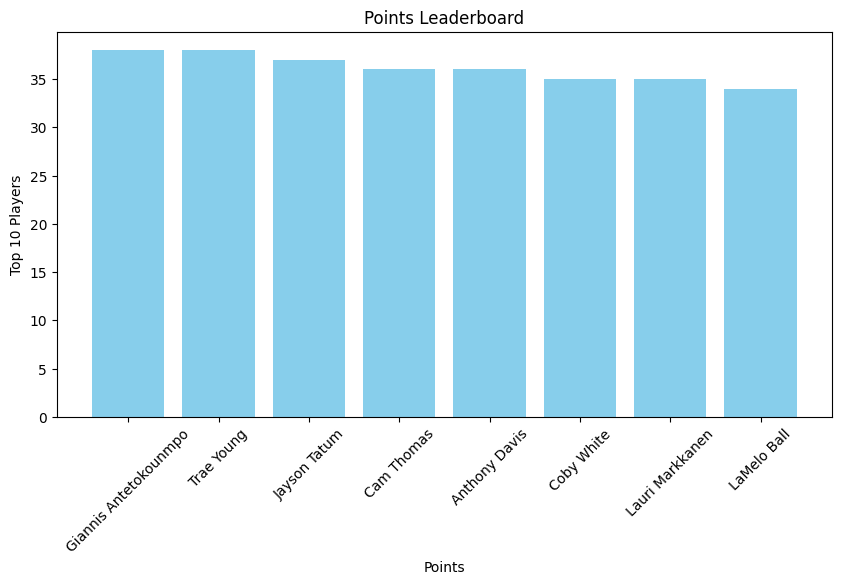

In [74]:
plt.figure(figsize=(10,5))
plt.bar(top_scores['PLAYER_NAME'],top_scores['PTS'], color='skyblue')
plt.title('Points Leaderboard')
plt.xlabel('Points')
plt.ylabel('Top 10 Players')
plt.xticks(rotation=45)  
plt.show()

In [75]:
top_avg = df.groupby('PLAYER_NAME')[['PTS','AST','REB']].mean().sort_values(by='PTS', ascending=False).head(10)

In [76]:
# Efficiency score 
df['EFF'] = df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'] - (df['FGA'] - df['FGM']) - (df['FTA'] - df['FTM']) - df['TO']

# Top 10 Efficient Players
top_eff = df.groupby('PLAYER_NAME')['EFF'].mean().sort_values(ascending=False).head(10)

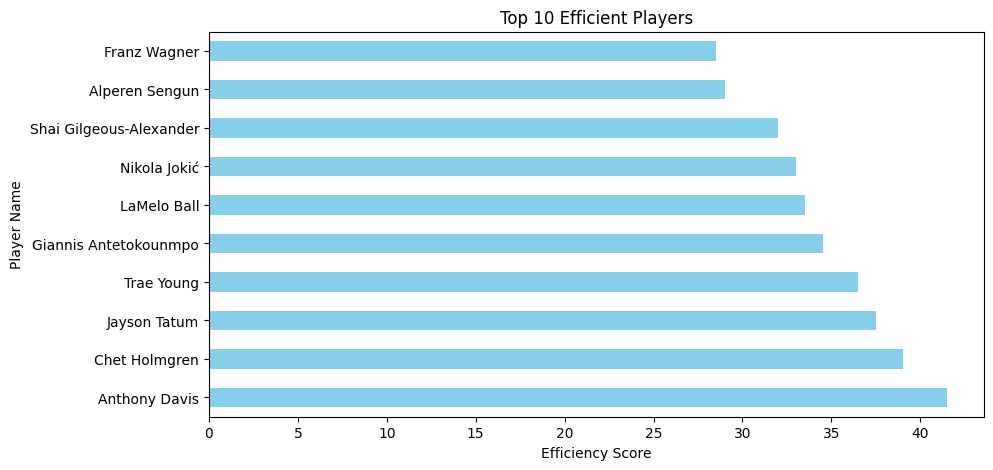

In [77]:
plt.figure(figsize=(10,5))
top_eff.plot(kind='barh', color='skyblue')
plt.xlabel('Efficiency Score')
plt.ylabel('Player Name')
plt.title('Top 10 Efficient Players')
plt.show()


In [78]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,IS_STARTER,EFF
0,22400061,1610612752,NYK,New York,1628384,OG Anunoby,OG,F,34.17,1.0,...,5.0,3.0,1.0,0.0,0.0,3.0,4.0,-21.0,1,7.0
1,22400061,1610612752,NYK,New York,1628404,Josh Hart,Josh,F,24.50,4.0,...,4.0,3.0,0.0,0.0,1.0,0.0,12.0,-23.0,1,14.0
2,22400061,1610612752,NYK,New York,1626157,Karl-Anthony Towns,Karl-Anthony,C,23.62,5.0,...,7.0,3.0,0.0,0.0,0.0,1.0,12.0,-18.0,1,18.0
3,22400061,1610612752,NYK,New York,1628969,Mikal Bridges,Mikal,G,34.62,7.0,...,0.0,2.0,0.0,0.0,1.0,0.0,16.0,-33.0,1,10.0
4,22400061,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,24.50,9.0,...,1.0,2.0,0.0,0.0,4.0,3.0,22.0,-23.0,1,16.0


3. Feature Engineering

In [79]:
# FREE THORWS IS GIVEN LESS WORTH, MULIPLIED BY 2 TO GET EFFICIENCY 1
denominator = 2 * (df['FGA'] + 0.44 * df['FTA']) #MULTIPLIED BY 0.44, AS NOT FT LEAD TO POSSESION

# IF PLAYER HAS NOT FT, DENOMINATOR BECOMES 0
df['TS_PCT'] = df['PTS'] / denominator
df.loc[denominator == 0, 'TS_PCT'] = 0 

#TS VALUE SHOULD BE BETWEEN 0 AND 1
df = df[(df['TS_PCT'] >= 0) & (df['TS_PCT'] <= 1)]

print(df[['PTS', 'FGA', 'FTA', 'TS_PCT']].head())

    PTS   FGA  FTA    TS_PCT
0   4.0   7.0  2.0  0.253807
1  12.0   6.0  6.0  0.694444
2  12.0   9.0  1.0  0.635593
3  16.0  13.0  1.0  0.595238
4  22.0  14.0  3.0  0.718016


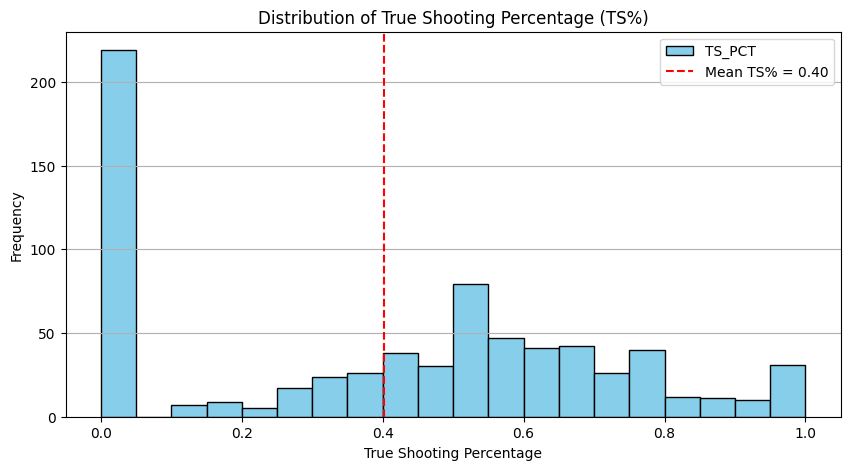

In [80]:
plt.figure(figsize=(10,5))
df['TS_PCT'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of True Shooting Percentage (TS%)')
plt.xlabel('True Shooting Percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-')
plt.axvline(df['TS_PCT'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean TS% = {df["TS_PCT"].mean():.2f}')
plt.legend()
plt.show()


In [81]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,IS_STARTER,EFF,TS_PCT
0,22400061,1610612752,NYK,New York,1628384,OG Anunoby,OG,F,34.17,1.0,...,3.0,1.0,0.0,0.0,3.0,4.0,-21.0,1,7.0,0.253807
1,22400061,1610612752,NYK,New York,1628404,Josh Hart,Josh,F,24.50,4.0,...,3.0,0.0,0.0,1.0,0.0,12.0,-23.0,1,14.0,0.694444
2,22400061,1610612752,NYK,New York,1626157,Karl-Anthony Towns,Karl-Anthony,C,23.62,5.0,...,3.0,0.0,0.0,0.0,1.0,12.0,-18.0,1,18.0,0.635593
3,22400061,1610612752,NYK,New York,1628969,Mikal Bridges,Mikal,G,34.62,7.0,...,2.0,0.0,0.0,1.0,0.0,16.0,-33.0,1,10.0,0.595238
4,22400061,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,24.50,9.0,...,2.0,0.0,0.0,4.0,3.0,22.0,-23.0,1,16.0,0.718016


In [82]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Make sure required columns exist
# You should already have 'EFF', 'TS_PCT', and 'MIN' in your df
# If not, calculate them first

# Step 2: Normalize the features
scaler = MinMaxScaler()
df[['EFF_scaled', 'TS_PCT_scaled', 'MIN_scaled']] = scaler.fit_transform(df[['EFF', 'TS_PCT', 'MIN']])

# Step 3: Define weights (you can tune these as needed)
weight_eff = 0.4
weight_ts = 0.3
weight_min = 0.3

# Step 4: Calculate Impact Score as a weighted average
df['IMPACT_SCORE'] = (
    weight_eff * df['EFF_scaled'] +
    weight_ts * df['TS_PCT_scaled'] +
    weight_min * df['MIN_scaled']
)


In [83]:
player_impact_avg = (
    df.groupby('PLAYER_NAME')['IMPACT_SCORE']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
player_impact_avg = player_impact_avg.sort_values(by='IMPACT_SCORE')


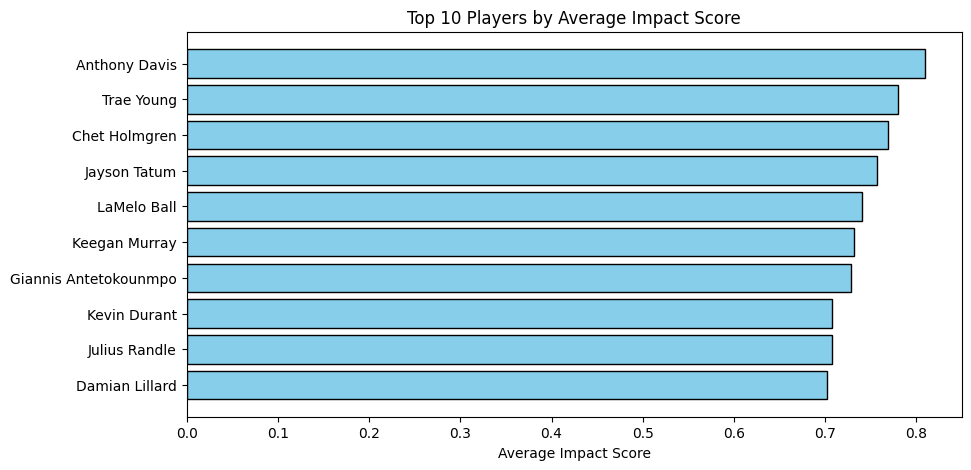

In [84]:
plt.figure(figsize=(10, 5))
plt.barh(player_impact_avg['PLAYER_NAME'], player_impact_avg['IMPACT_SCORE'], color='skyblue', edgecolor='black')
plt.xlabel("Average Impact Score")
plt.title("Top 10 Players by Average Impact Score")

plt.show()

Machine Learning 

In [85]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,...,PF,PTS,PLUS_MINUS,IS_STARTER,EFF,TS_PCT,EFF_scaled,TS_PCT_scaled,MIN_scaled,IMPACT_SCORE
0,22400061,1610612752,NYK,New York,1628384,OG Anunoby,OG,F,34.17,1.0,...,3.0,4.0,-21.0,1,7.0,0.253807,0.215686,0.253807,0.782459,0.397154
1,22400061,1610612752,NYK,New York,1628404,Josh Hart,Josh,F,24.50,4.0,...,0.0,12.0,-23.0,1,14.0,0.694444,0.352941,0.694444,0.561026,0.517818
2,22400061,1610612752,NYK,New York,1626157,Karl-Anthony Towns,Karl-Anthony,C,23.62,5.0,...,1.0,12.0,-18.0,1,18.0,0.635593,0.431373,0.635593,0.540875,0.525489
3,22400061,1610612752,NYK,New York,1628969,Mikal Bridges,Mikal,G,34.62,7.0,...,0.0,16.0,-33.0,1,10.0,0.595238,0.274510,0.595238,0.792764,0.526205
4,22400061,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,24.50,9.0,...,3.0,22.0,-23.0,1,16.0,0.718016,0.392157,0.718016,0.561026,0.540575


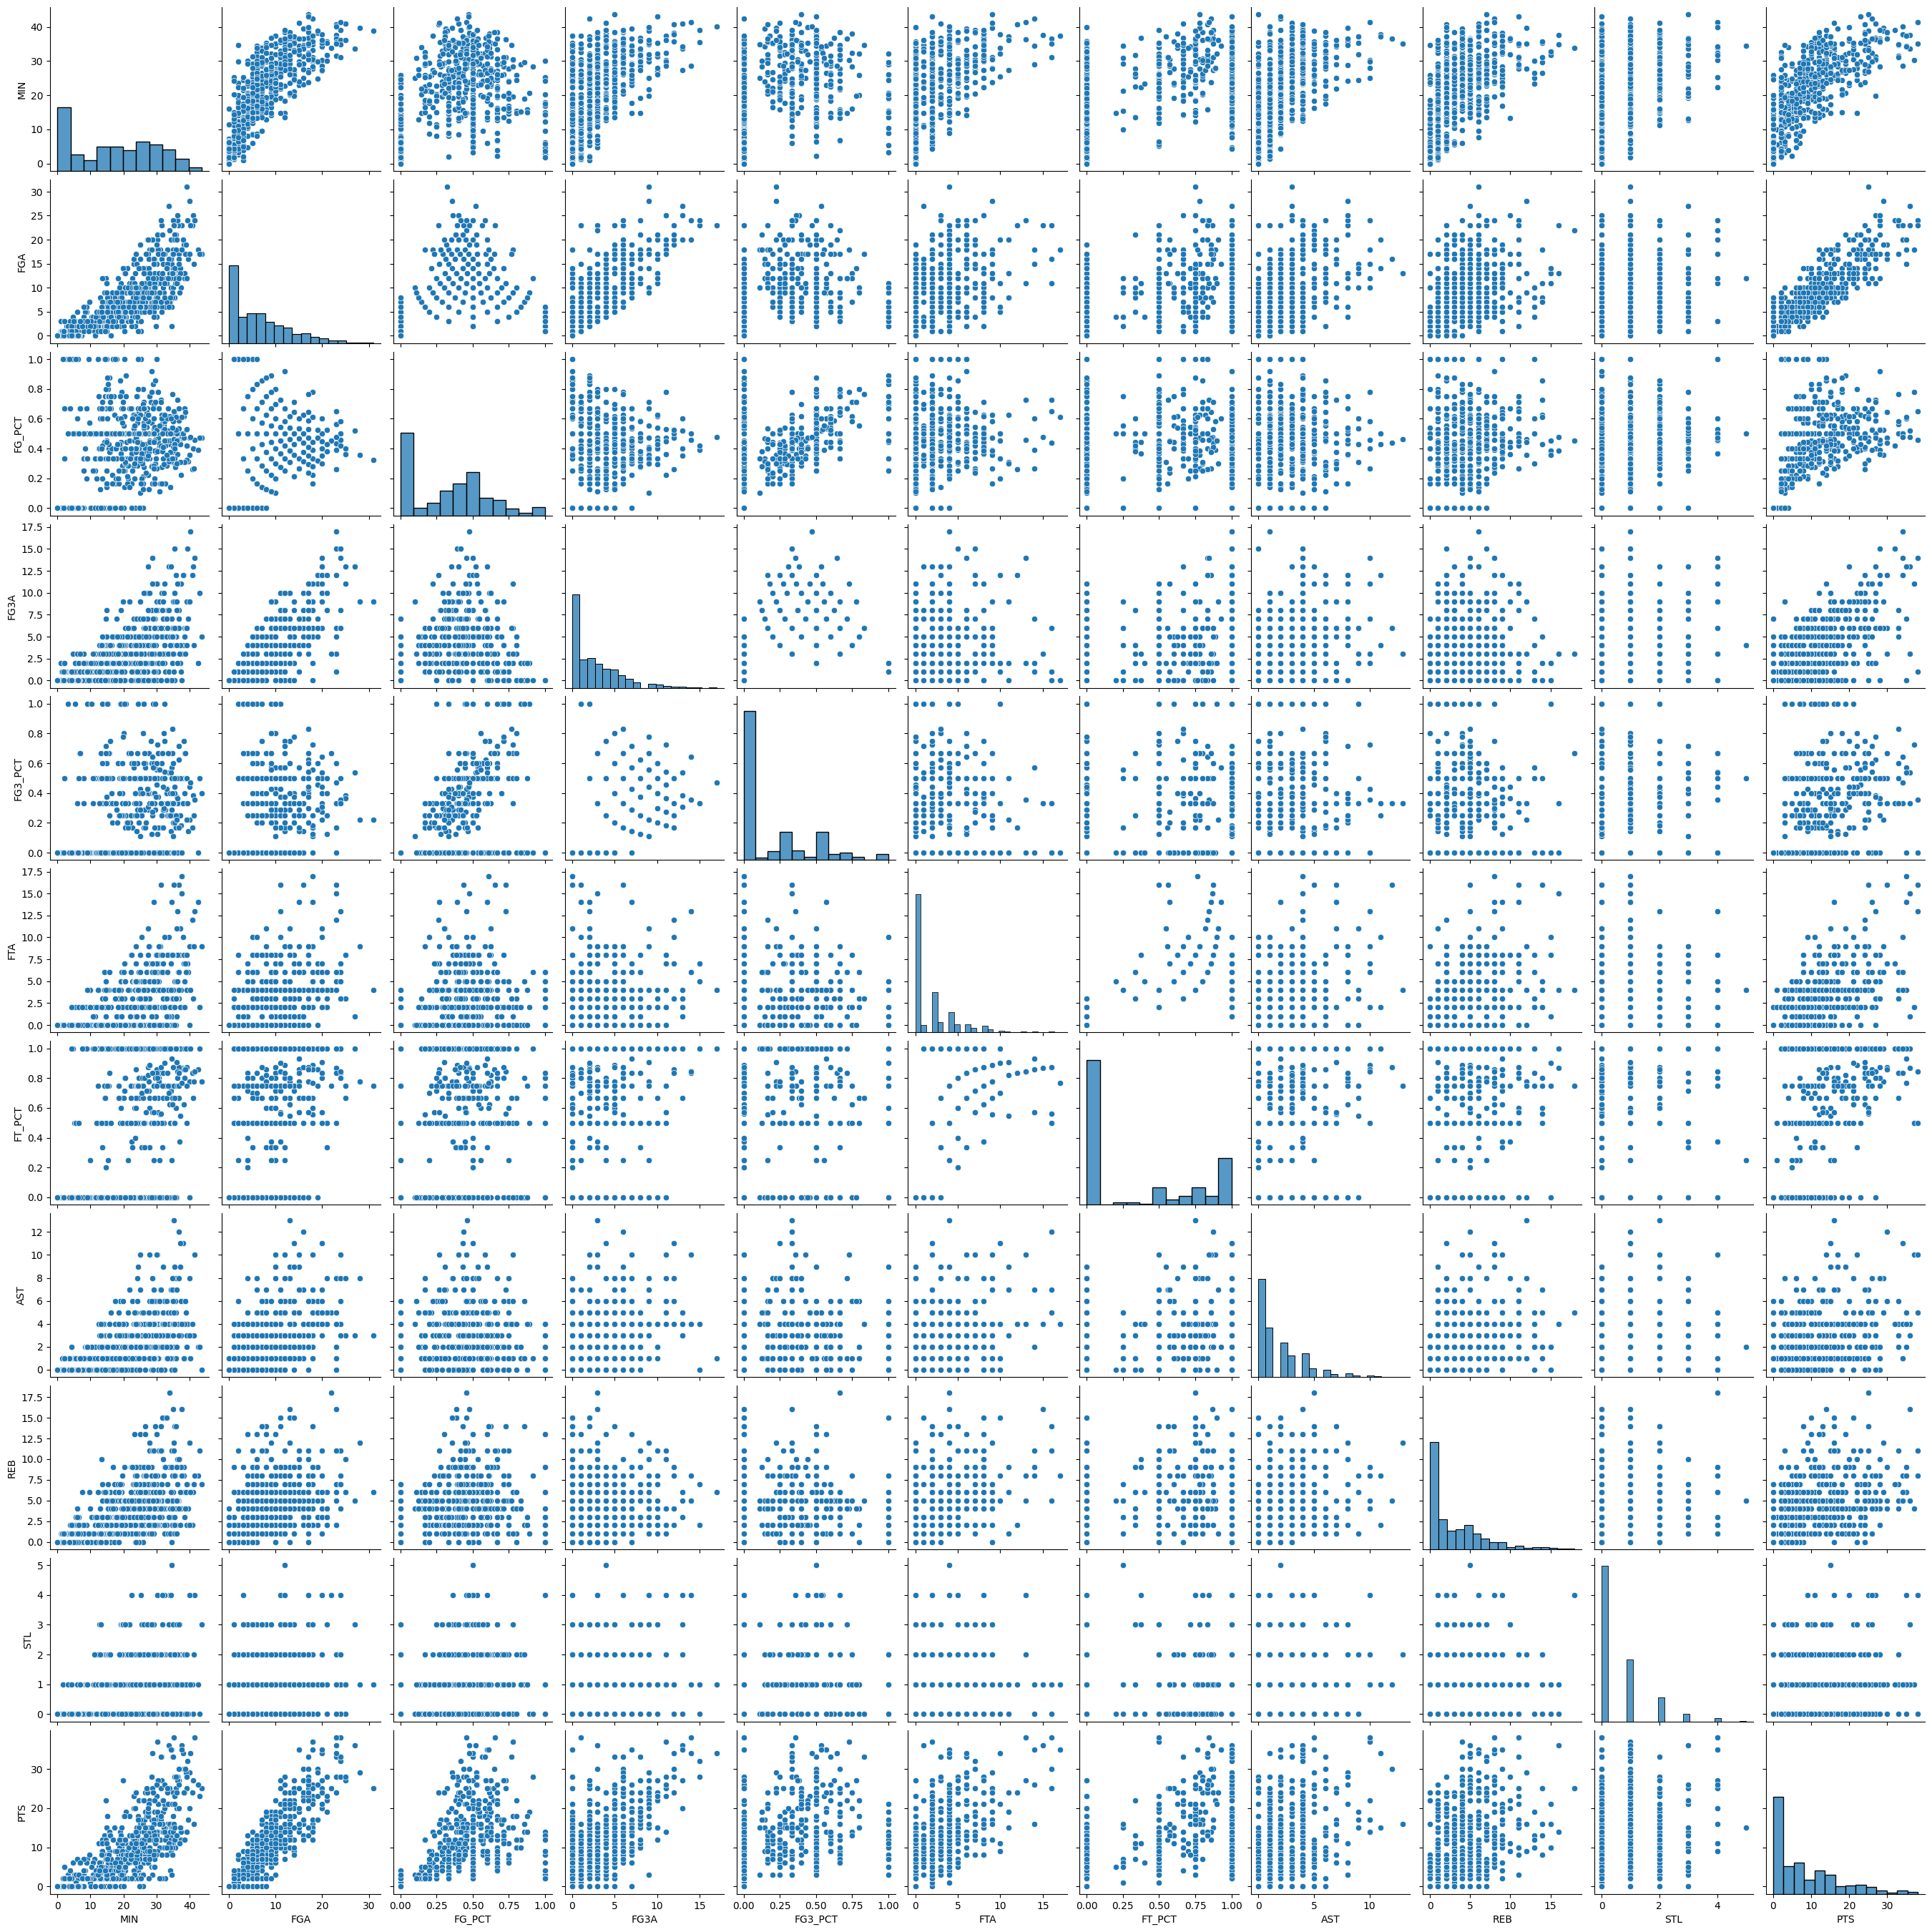

              MIN       FGA    FG_PCT      FG3A   FG3_PCT       FTA    FT_PCT  \
MIN      1.000000  0.843775  0.574396  0.685683  0.458544  0.601724  0.615754   
FGA      0.843775  1.000000  0.446681  0.808566  0.446313  0.593745  0.577252   
FG_PCT   0.574396  0.446681  1.000000  0.285096  0.459826  0.335767  0.368025   
FG3A     0.685683  0.808566  0.285096  1.000000  0.509134  0.321461  0.445152   
FG3_PCT  0.458544  0.446313  0.459826  0.509134  1.000000  0.195990  0.305734   
FTA      0.601724  0.593745  0.335767  0.321461  0.195990  1.000000  0.657135   
FT_PCT   0.615754  0.577252  0.368025  0.445152  0.305734  0.657135  1.000000   
AST      0.648950  0.609746  0.348345  0.474108  0.299590  0.473341  0.398603   
REB      0.679657  0.574331  0.459354  0.308083  0.224174  0.535468  0.453829   
STL      0.457717  0.386303  0.294129  0.330462  0.259632  0.207762  0.251422   
PTS      0.797991  0.911764  0.588552  0.719211  0.546419  0.702680  0.640865   

              AST       REB

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distributions of features
player_stats = ['MIN', 'FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'AST', 'REB', 'STL', 'PTS']
sns.pairplot(df[player_stats])
plt.show()

# Check correlations to see if any features have significantly different scales
print(df[player_stats].corr())


In [87]:
#player_stats = ['MIN', 'FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'AST', 'REB', 'STL', 'PTS']


In [88]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (if needed)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[player_stats[:-1]])  # Don't scale target column (PTS)

# Add scaled features to the dataframe
scaled_df = pd.DataFrame(scaled_features, columns=player_stats[:-1])
df_scaled = df.copy()
df_scaled[player_stats[:-1]] = scaled_df

# Check the scaled data
print(df_scaled.head())


    GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  22400061  1610612752               NYK  New York    1628384   
1  22400061  1610612752               NYK  New York    1628404   
2  22400061  1610612752               NYK  New York    1626157   
3  22400061  1610612752               NYK  New York    1628969   
4  22400061  1610612752               NYK  New York    1628973   

          PLAYER_NAME      NICKNAME START_POSITION       MIN  FGM  ...   PF  \
0          OG Anunoby            OG              F  1.344242  1.0  ...  3.0   
1           Josh Hart          Josh              F  0.580412  4.0  ...  0.0   
2  Karl-Anthony Towns  Karl-Anthony              C  0.510901  5.0  ...  1.0   
3       Mikal Bridges         Mikal              G  1.379787  7.0  ...  0.0   
4       Jalen Brunson         Jalen              G  0.580412  9.0  ...  3.0   

    PTS  PLUS_MINUS  IS_STARTER   EFF    TS_PCT  EFF_scaled  TS_PCT_scaled  \
0   4.0       -21.0           1   7.0  0.253807   

In [89]:
df['PTS'].describe()

count    714.000000
mean       8.084034
std        8.785184
min        0.000000
25%        0.000000
50%        6.000000
75%       13.000000
max       38.000000
Name: PTS, dtype: float64

In [90]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Original player stats (leakage-prone features will be removed)
player_stats = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
                'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
                'STL', 'BLK', 'TO', 'PF', 'PLUS_MINUS']

# Columns that directly contribute to PTS (to be excluded to prevent leakage)
leakage_cols = ['FGM', 'FG3M', 'FTM']

# Define clean feature set (without leakage)
clean_features = [col for col in player_stats if col not in leakage_cols]

# Step 1: Scale features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[clean_features] = scaler.fit_transform(df_scaled[clean_features])

# Step 2: Features (X) and Target (y)
X = df_scaled[clean_features]
y = df_scaled['PTS']

# Step 3: Handle NaNs
X = X.dropna()
y = y.loc[X.index]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Step 6: Fit models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Step 7: Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Step 8: Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Step 9: Print Results
print(f"Linear Regression → RMSE: {rmse_lr:.3f}, R²: {r2_lr:.3f}")
print(f"Random Forest     → RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")
print(f"XGBoost           → RMSE: {rmse_xgb:.3f}, R²: {r2_xgb:.3f}")


Linear Regression → RMSE: 2.306, R²: 0.939
Random Forest     → RMSE: 1.905, R²: 0.959
XGBoost           → RMSE: 1.465, R²: 0.975


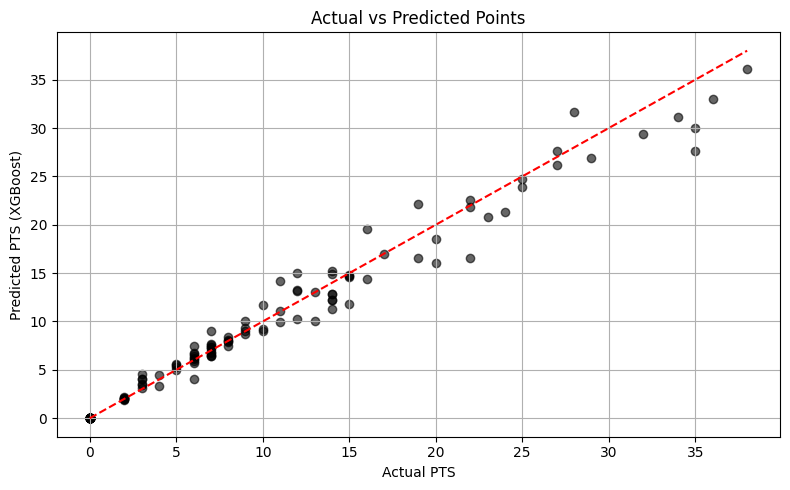

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='BLACK', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PTS")
plt.ylabel("Predicted PTS (XGBoost)")
plt.title("Actual vs Predicted Points")
plt.grid(True)
plt.tight_layout()
plt.show()


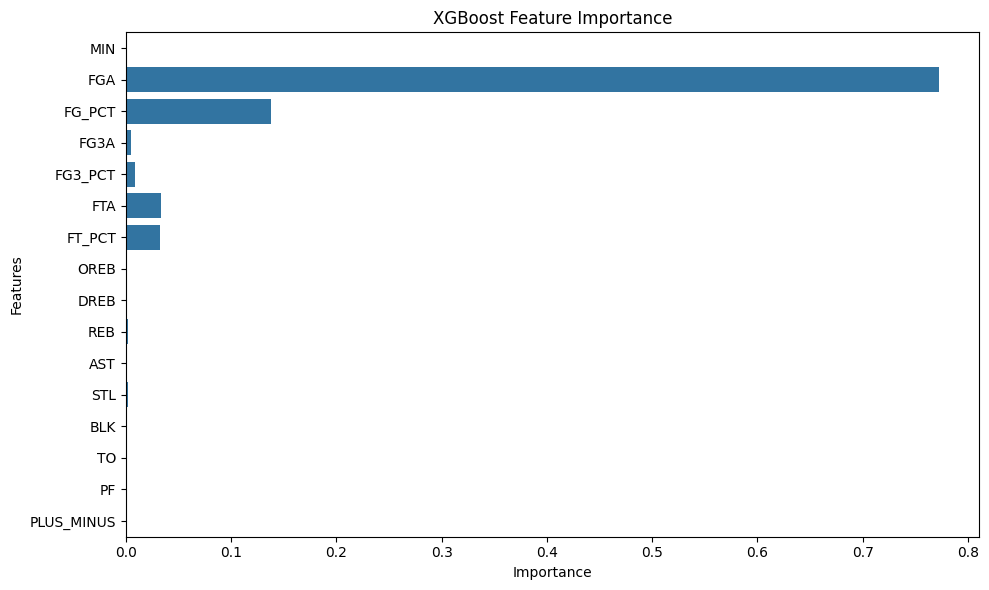

In [93]:
importances = xgb.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [94]:
import pandas as pd

In [95]:
df1 = pd.read_csv('cleaned_NBA_DATASET.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_NBA_DATASET.csv'

In [96]:
df.to_csv('cleaned_NBA_DATASET.csv', index=False) 

In [101]:
df2 = pd.read_csv('cleaned_NBA_DATASET.csv')
df2.shape

(714, 35)

In [102]:
df.shape

(714, 35)